# Gradient Descent

In [2]:
import warnings
import numpy as np

## Computing Gradient of a Function

In [3]:
def partial(f, x, i=0, dx=1e-6):
    """Computes i-th partial derivative of f at point x.
    
    Args:
        f: objective function.
        x: point at which partial derivative is computed.
        i: coordinate along which derivative is computed.
        dx: slack for finite difference.
        
    Output:
        (float)

    """
    x = x.reshape(1, -1)
    h = np.zeros(x.shape)
    h[0, i] = dx
    return (f(x + h) - f(x - h)) / (2*dx)

In [4]:
partial(lambda x: x[0, 0]**4 + x[0, 1], np.array([5, 6]))

500.00000004502

In [5]:
def gradient(f, x, dx=1e-6):
    """Computes gradient of f at point x.
    
    Args:
        f: objective function.
        x: point at which gradient is computed.
        dx: slack for finite difference of partial derivatives.
        
    Output:
        (ndarray) of size domain of f.
        
    """
    x = x.reshape(1, -1)
    dim = x.shape[1]
    return np.array([partial(f, x, i, dx) for i in range(dim)]).reshape(1, -1)

In [6]:
gradient(lambda x: x[0, 0]**5 + x[0, 1]*2, np.array([1, 10]))

array([[5., 2.]])

## Gradient Descent Class

In [7]:
class GD():
    """Gradient Descent Object.
    
    Implements gradient descent aiming to compute optimal objective 
    value of convex functions and local optimal ones of none 
    convex functions.
    
    """    
    def __init__(self, d_dir=gradient, 
                 rate=(lambda x, y, z, grad: 0.01), 
                 decay=(lambda x: np.linalg.norm(x)), 
                 tol=1e-6, max_iter=1000, grad=gradient):
        """        
        Instantiates a GD object.
    
        Attributes:
        d_dir: function computing descent direction.
        rate: function computing learning rate ; takes in
              - f (function): objective function
              - x (ndarray): current iterate
              - dir_x (ndarray): output of a descent direction function
              - grad (ndarray): gradient function.
        decay: function computing decay.
        tol: slack tolerance.
        max_iter: upper bound on number of iterations.
    
        """
        self.d_dir = d_dir
        self.rate = rate
        self.decay = decay
        self.tol = tol
        self.max_iter = max_iter
        self.grad = gradient
    
    def __call__(self, x, f):
        """Calling gradient descent object with specific starting point and optimal function.
        
        Args:
            x: initial starting point for descent.
            f: objective function of optimisation problem.
        
        Output:
            (float) sub-optimal value up to tolerance if execution is proper.
            (ndarray) list of gradient descent iterates.
            
        """
        x = x.reshape(1, -1)
        n_iter = 0
        dir_x = -self.d_dir(f, x, self.tol)
        delta_x = self.rate(f, x, dir_x, n_iter) * dir_x
        iters, iters_dir = x, delta_x
        grad_f_x = self.grad(f, x)
        decay = self.decay(grad_f_x)
        while decay > self.tol and n_iter < self.max_iter:
            ## Deciding on direction
            dir_x = -self.d_dir(f, x, self.tol)
            delta_x = self.rate(f, x, dir_x, n_iter) * dir_x
            ## Updating iterate
            x = x + delta_x
            ## Storing on-going data
            iters_dir = np.vstack([iters_dir, delta_x])
            iters = np.vstack([iters, x])
            ## Computing decay
            grad_f_x = self.grad(f, x)
            decay = self.decay(grad_f_x)
            ## Updating iteration number
            n_iter += 1
        msg = " Iteration nu. = {}\n approx. = {}\n ob value = {}\n and decay = {}."
        print(msg.format(n_iter, x.flatten(), f(x), decay))
        if decay > self.tol:
            warnings.warn("Decay didn't get under tolerance rate.", RuntimeWarning)
        return (x, iters, iters_dir, n_iter) 

In [8]:
DG_classic = GD()

In [9]:
op_pt, iters, iters_dir, n_iter = DG_classic(np.array([10]), lambda x: 3*x[0]**2 + 2*x[0] + 1)

 Iteration nu. = 290
 approx. = [-0.33333317]
 ob value = [0.66666667]
 and decay = 9.987566329527908e-07.


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
sns.set_style("whitegrid")

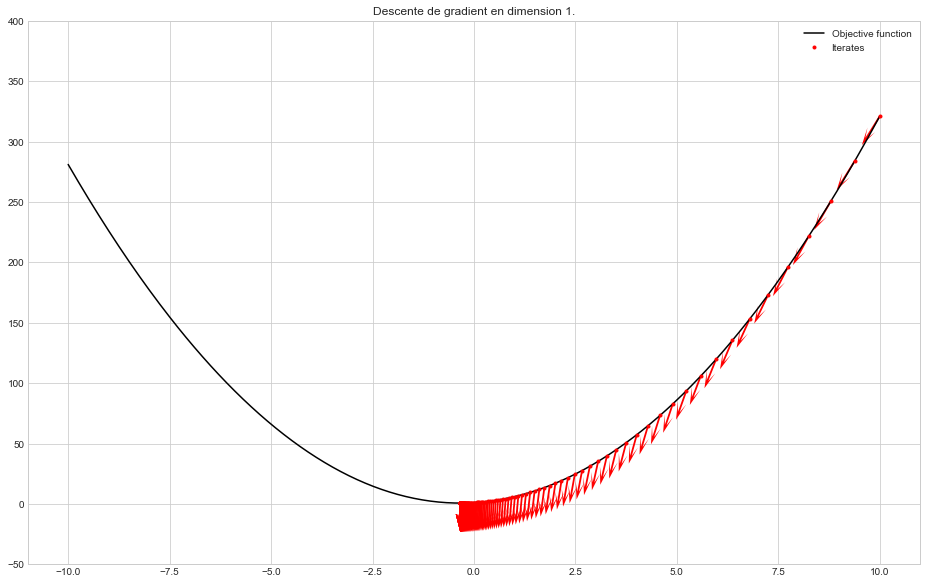

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))
f = lambda x : 3*x**2 + 2*x + 1
x = np.linspace(-10, 10, 400)
ax.set_ylim(-50, 400)
ax.plot(x, f(x), "k-", label="Objective function")
# reshaping iters for input
iters_reshape = iters.reshape(iters.shape[0], 1)
ax.plot(iters_reshape, f(iters_reshape), 'r.', label="Iterates")
ax.quiver(iters_reshape, f(iters_reshape), iters_dir, -1, 
          color='r', scale=None, width=0.002, headwidth=5, headlength=10)
ax.set_title("Descente de gradient en dimension 1.")
ax.legend()

In [15]:
g = lambda x: x[0, 0]**2 + 10*x[0, 1]**2
op_pt_2, iters_2, iters_dir_2, n_iter_2 = DG_classic(np.array([1.5, 1.5]), g)

 Iteration nu. = 739
 approx. = [ 4.92222198e-07 -9.18170480e-23]
 ob value = 2.422826926562737e-13
 and decay = 9.844443969189396e-07.


In [14]:
x = np.linspace(0, 2, 3)
y = np.linspace(0, 2, 3)
X, Y = np.meshgrid(x, y)
np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(1, 2, -1)

array([[[0., 1., 2., 0., 1., 2., 0., 1., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]]])